In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:98% !important; }</style>"))

import pandas as pd
pd.set_option("display.max_columns",999)
pd.options.display.max_rows = 9999
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_emails = pd.read_csv('data/email_data.csv',delimiter=',')
display(df_emails.head())

df_activity = pd.read_csv('data/activity_data.csv',delimiter=',')
display(df_activity.head())

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN


,UserId,DateOfActivityPST,ActivityCount
0,241710509395,2019-09-24,29
1,241710509395,2020-09-11,60
2,435228414681,2018-01-06,12
3,435228414681,2018-04-20,20
4,435228414681,2018-05-10,136


In [4]:
"""problem 1. how many rows in the two datasets"""
print("df_emails has ", df_emails.shape[0], " number of rows")
print("df_activity has ", df_activity.shape[0], " number of rows")

df_emails has  474163  number of rows
df_activity has  4559973  number of rows


In [191]:
"""If the log of emails represents 3% of the emails sent over this period, how many emails were sent"""
"""Based on my understanding of this question, the dataset only includes 3% of emails that were sent. Therefore
I simply count the number of emails in the dataset and then calculate the total number of emails. I am assuming 
that I may have duplicates in the data so I tried to get the unique email ids"""
import math
emails_ids = df_emails['LogId'].unique()
num_of_indv_emails = len(emails_ids)
total_num_of_emails = math.ceil((num_of_indv_emails * 100) / 3)
print('totally ', total_num_of_emails, 'emails were sent')

totally  15805434 emails were sent


In [192]:
"""What are the earliest and most recent dates of emails sent in this dataset in California time"""
from pytz import timezone
import pytz
email_sent_date = df_emails['EmailSentDateTimeUtc']
dates_pts = pd.to_datetime(email_sent_date).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
sorted_dates = sorted(dates_pts)
print('The earliest date: ', sorted_dates[0])
print('The most recent date: ', sorted_dates[-1])

The earliest date:  2018-01-03 20:29:47.573000-08:00
The most recent date:  2021-04-19 06:45:15.720000-07:00


In [193]:
"""Which 10 zip codes receive the most emails and how many emails do they receive"""
from collections import Counter
import json
addresses = df_emails['AddressData'].dropna()
zipcodes = []
for address in addresses:
    json_acceptable_string = address.replace("'", "\"")
    d = json.loads(json_acceptable_string)
    zipcodes.append(d['ZipCode'])
counts = dict(Counter(zipcodes))
counts.pop('NULL', None)
sorted_counts = sorted(counts, key=counts.get, reverse=True)
print("The first 10 most repeated zipcodes are: ", sorted_counts[:10])
print("The most repeated zipcode is: ", max(counts, key=counts.get))

The first 10 most repeated zipcodes are:  ['34210', '33801', '63301', '36104', '95971', '38301', '29203', '42301', '57401', '75134']
The most repeated zipcode is:  34210


In [194]:
"""ploting two lines: total distinct users who were sent at least 1 email by month and year
and the monthly percentage of users who were sent an email and were active the same day.
first I need to calculate these two values"""

'ploting two lines: total distinct users who were sent at least 1 email by month and year\nand the monthly percentage of users who were sent an email and were active the same day.\nfirst I need to calculate these two values'

In [195]:
"""to calculate total distinct users who were sent at least 1 email by month and year, I need to divid dates into 
groups for each month and year."""
email_sent_date = pd.to_datetime(df_emails['EmailSentDateTimeUtc'])
m_y = email_sent_date.dt.to_period('M')
m_y_df = pd.DataFrame()
m_y_df['UserId'] = df_emails['UserId']
m_y_df['m_y_date'] = m_y
print(m_y_df)
line_1 = m_y_df.groupby(['m_y_date']).count()

              UserId m_y_date
0       851332105693  2019-07
1       369293054977  2019-08
2       938684493058  2019-08
3        50233193142  2019-08
4       369293054977  2019-08
...              ...      ...
474158  155726404619  2021-04
474159  906354699455  2021-04
474160  772106964664  2021-04
474161  944437414453  2021-04
474162  944437414453  2021-04

[474163 rows x 2 columns]


In [196]:
"""to calculate the monthly percentage of users who were sent an email and were active the same day, I need to use 
the second dataset to get the users who were active the same day"""
import numpy as np
active_users = df_activity[['UserId', 'DateOfActivityPST']]
active_users.columns = ['UserId', 'date']
email_date = pd.to_datetime(df_emails['EmailSentDateTimeUtc']).dt.to_period('D')
email_date_df = pd.DataFrame()
email_date_df['UserId'] = df_emails['UserId']
email_date_df['date'] = [str(i) for i in email_date]
intersection = pd.merge(email_date_df, active_users, how='inner')
date = pd.to_datetime(intersection['date'])
m_y = date.dt.to_period('M')
intersection['date'] = m_y
print(intersection)
line_2 = intersection.groupby(['date']).count()

             UserId     date
0      186430397022  2020-04
1      647719877575  2020-10
2      369293054977  2019-03
3      777936414070  2018-07
4      777936414070  2020-03
...             ...      ...
87897  765798319854  2021-04
87898  154439063284  2021-04
87899  772106964664  2021-04
87900  944437414453  2021-04
87901  944437414453  2021-04

[87902 rows x 2 columns]


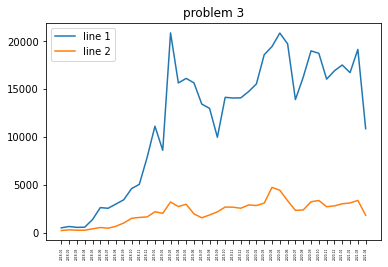

In [197]:
import matplotlib.pyplot as plt
plt.plot(range(line_1.shape[0]), line_1['UserId'].values, label = "line 1")
plt.plot([str(i) for i in line_2.index], line_2['UserId'].values, label = "line 2")
plt.xticks(fontsize=3, rotation=90)
plt.title('problem 3')
plt.legend()
plt.show()